In [51]:
import sys
import numpy as np
sys.path.append("/Users/vasilis/")
from IPython.display import Image
from IPython.display import Latex
import vaspy
from matplotlib import pyplot as plt
plt.ion()

# Densification of polar snow
------------------------------------------------------------------------------

The transformation of snow to firn and eventually ice is one of the most important processes in ice core glaciology. A "mixed blessing" as Christo Buizert has once called it, it gives us challenges when we try to interpret ice core records but also provides us with many paleoclimatic tools to study past climate. We will deal with densification of snow at a dry snow zone, descibe the boundary conditions of the problem and derive a simple semi-empirical model for the process of densification based on the paper by Herron and Langway. The goal of this module is to understand the parameters at play in the densification of snow, get familiar with important definitions often used in ice core science, build matlab/python code that impliments the Herron and Langway densification model and finally apply it on several ice core data sets frm Greenland and Antarctica.

## Importance of understanding densification

Firn is a porous medium with interconnected channels of space not used by ice. This allows for gas transport from the time of deposition of the fresh snow until the time firn reaches a density that does not allow further gas diffusion. Effectively, the gas molecules at a depth $z$ in the firn constitute a mixture of molecules from different depths (essentially from the surface) and different ages. In the same time water molecules are allowed to move freele in the vapor phase within the porous medium of the firn. This allows for a diffusion process that attenuates the isotopic signal and can sometimes result in a complete obliteration of the isotopic annual signal. These phenomena have some very interesting implications.

1. The age of the gas molecules is different to that of the ice matrix surrounding them with the latter being always older. As a result, when studying an ice core and investigating leads/lags between gas concentrations and other parameters in the ice matrix (as for example water isotopes or chemical impurities) one needs to take into account this difference in age typically referred to as $\Delta$age.

2. Not only is the age of gas molecules at a depth $z$ younger than that of the ice, but it is also not unique. Due to the diffusive tramsport movement of gases in the firn a mixing process results in a distribution of ages for every depth. The longer the densification process the more wide these distributions will be. 

3. Water isotopic signals experience a diffusive attenuation in firn that takes place in the vapor phase. This process starts from the time of deposition and ends at the close--off depth where most of the interconnected air channels have transformed into individual bubbles. This results in loss of information that can party be retrieved but it is also a temperature dependent process that contains paleoclimatic information.

From the points above it becomes clear that understanding firn densification and being able to quantitatively model it, is vital in working with ice core records and in particular gas concentrations from the bubbles occluded in the ice core. 

## Stages of densification


* Initial snow to ** critical density ** $\left( \rho<550 {\text{ kgm}}^{-3} \right)$
There is rapid densification at this stage via grain settling and packing. Particles rapidly reduce the total surface area of the crystals


* Critical Density to approximately close-off depth
Densification rates are slower at this stage with density slowly reaching close-off values $\left(550<\rho<820 \text{  kgm}^{-3} \right)$. At close off the air passages become clossed-off and form air bubbles.


* Close-off density to ice $\left(820<\rho<920 \text{  kgm}^{-3} \right)$
At this stage about 90% of the air has ascaped to the surface and the individual bubbles compress further for the ice to reach $920 \text{  kgm}^{-3}$


The process of densification is temperature and accumulation dependant.



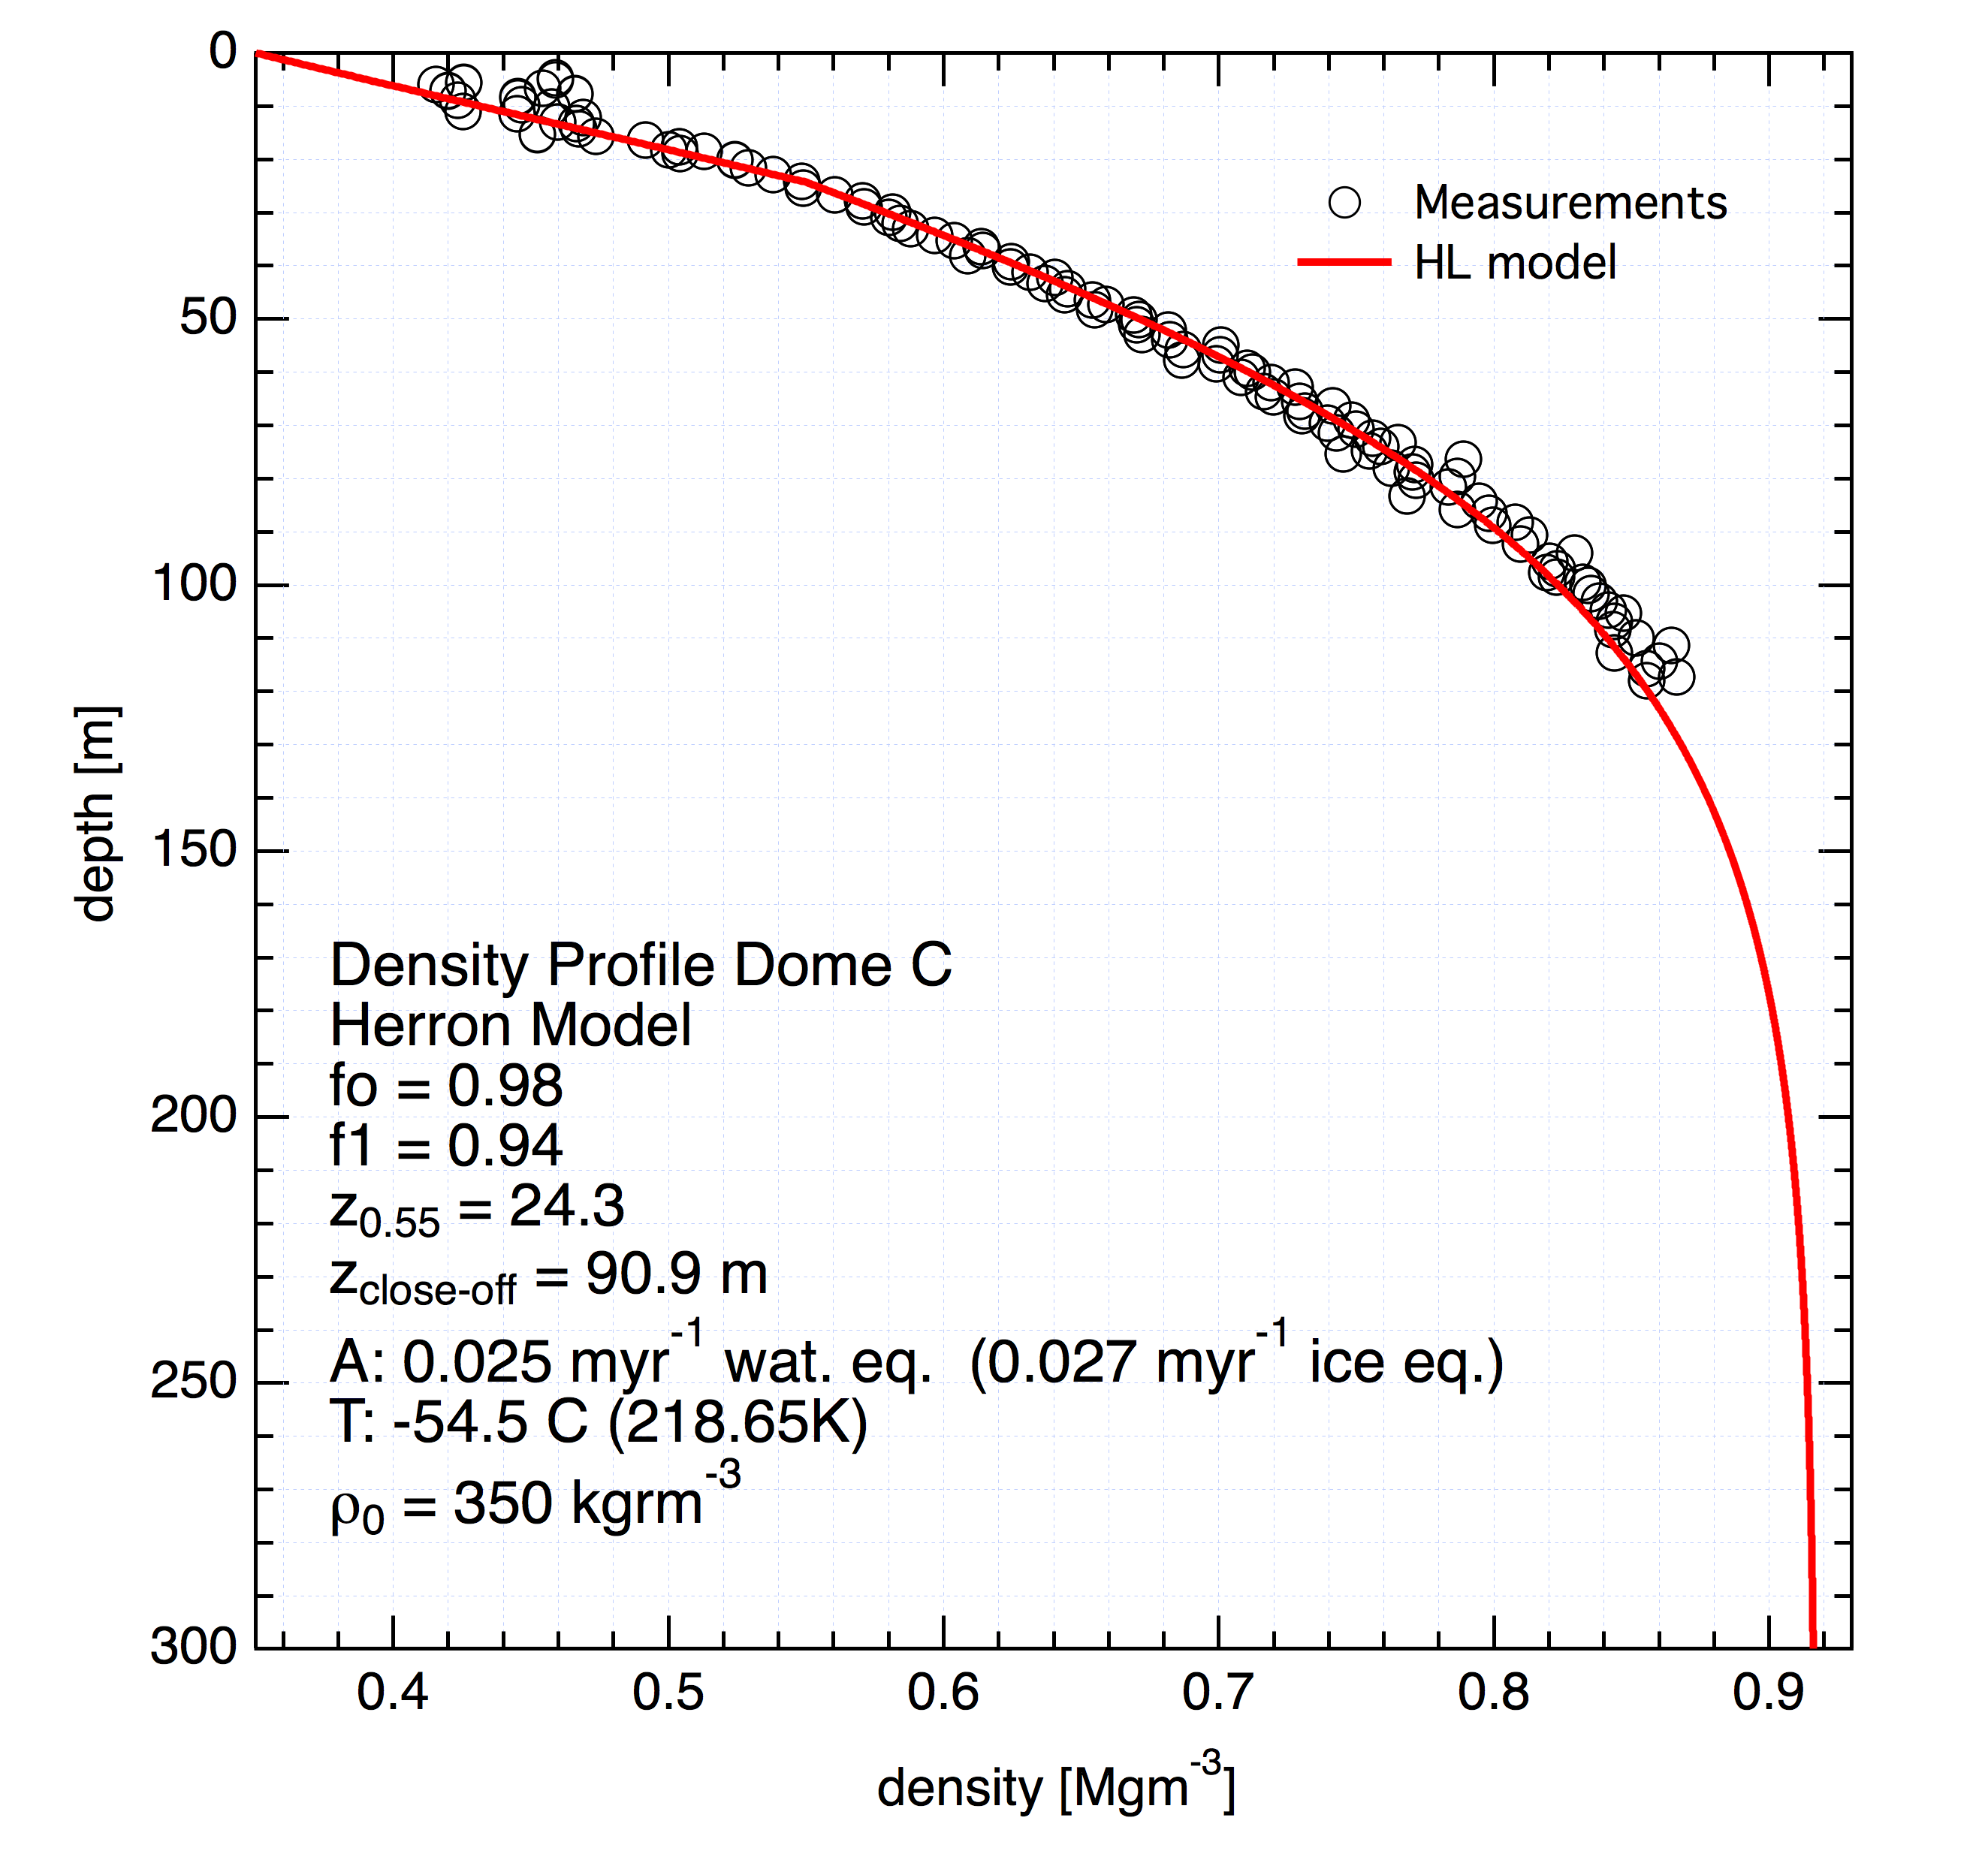

In [52]:
Image("../figs/dome_c_density_herron.png", width = 700)

## Some definitions
-------------------------------------

### Porosity
$s = 1-\frac{\rho}{\rho_{\text{ice}}}$

Porosity is the interstitial space between ice crystals. It can be referred to as open porosity if pores are still connected with the atmosphere, or closed ifpores have been closed-off.

### Mean close-off density  
${\overline{\rho}}_{co} = {\left( \frac{1}{\rho_{ice}} + 6.95 \times 10^{-7}T-4.3 \times 10^{-5} \right)}^{-1} $

The average density at which the bubbles are close-off. Mostly dependant on temperature (and wind).

###  Full close-off depth
The depth at which all air has been occluded into bubbles.

### Lock-in depth
The depth at which vertical gas transport has ceased. Likely due to high-density layers above the close-off depth. There is still open porosity below this depth and often it can be pumped 

### Some values to remember:
|Description of medium   | Density Range $\left[ \text{kgm}^{-3} \right]$    |
|------------------------|------------------:|
|New snow                | 50-70            |
|Settled snow            | 200-300          |
|Wind packed snow        | 350-400          |
|Firn                    | 400-830          |
|Glacial Ice             | 830-920          |

# The Herron and Langway densification model
### Semi-empirical model based on physical principles and parametrizations based on data.
The main assumption of the Herron and Langway (HL model) hereafter is that the density change is proportional to the overburden snow. Mathematicall this can be expressed as:
$\frac{d\rho}{\left( \rho_i - \rho \right)} = \text{const}\cdot\rho dh$. Integration of this equation shows that $\ln \left[\rho/\left(\rho_I - \rho \right)\right]$ is linearly related to depth.

In the H-L model the effect of accumulation and temperature in the densification rates is separated resulting in the two densification rate equations for the upper and deeper stage of densification:

* $\frac{d\rho}{dt} = A^a K_o \left( \rho_i - \rho \right)  \;\;\rho<550\text{  kgm}^{-3}$
* $\frac{d\rho}{dt} = A^b K_1 \left( \rho_i - \rho \right)  \;\; 550 \text{  kgm}^{-3} < \rho < \rho_i$

and $a = 1, b=0.5$ and $K_o$ and $K_1$ are given by the Arhenius type equations:
* $K_o = 11\exp \left( \frac{10160}{RT} \right)$
* $K_1 = 575\exp \left( \frac{21400}{RT} \right)$
with $R = 8.314 \;\;\text{JK}^{-1}\text{mole}^{-1}$

### Remember all densities in the H-L model are in Mgm-3 and accumulation rates in water equivalent..!



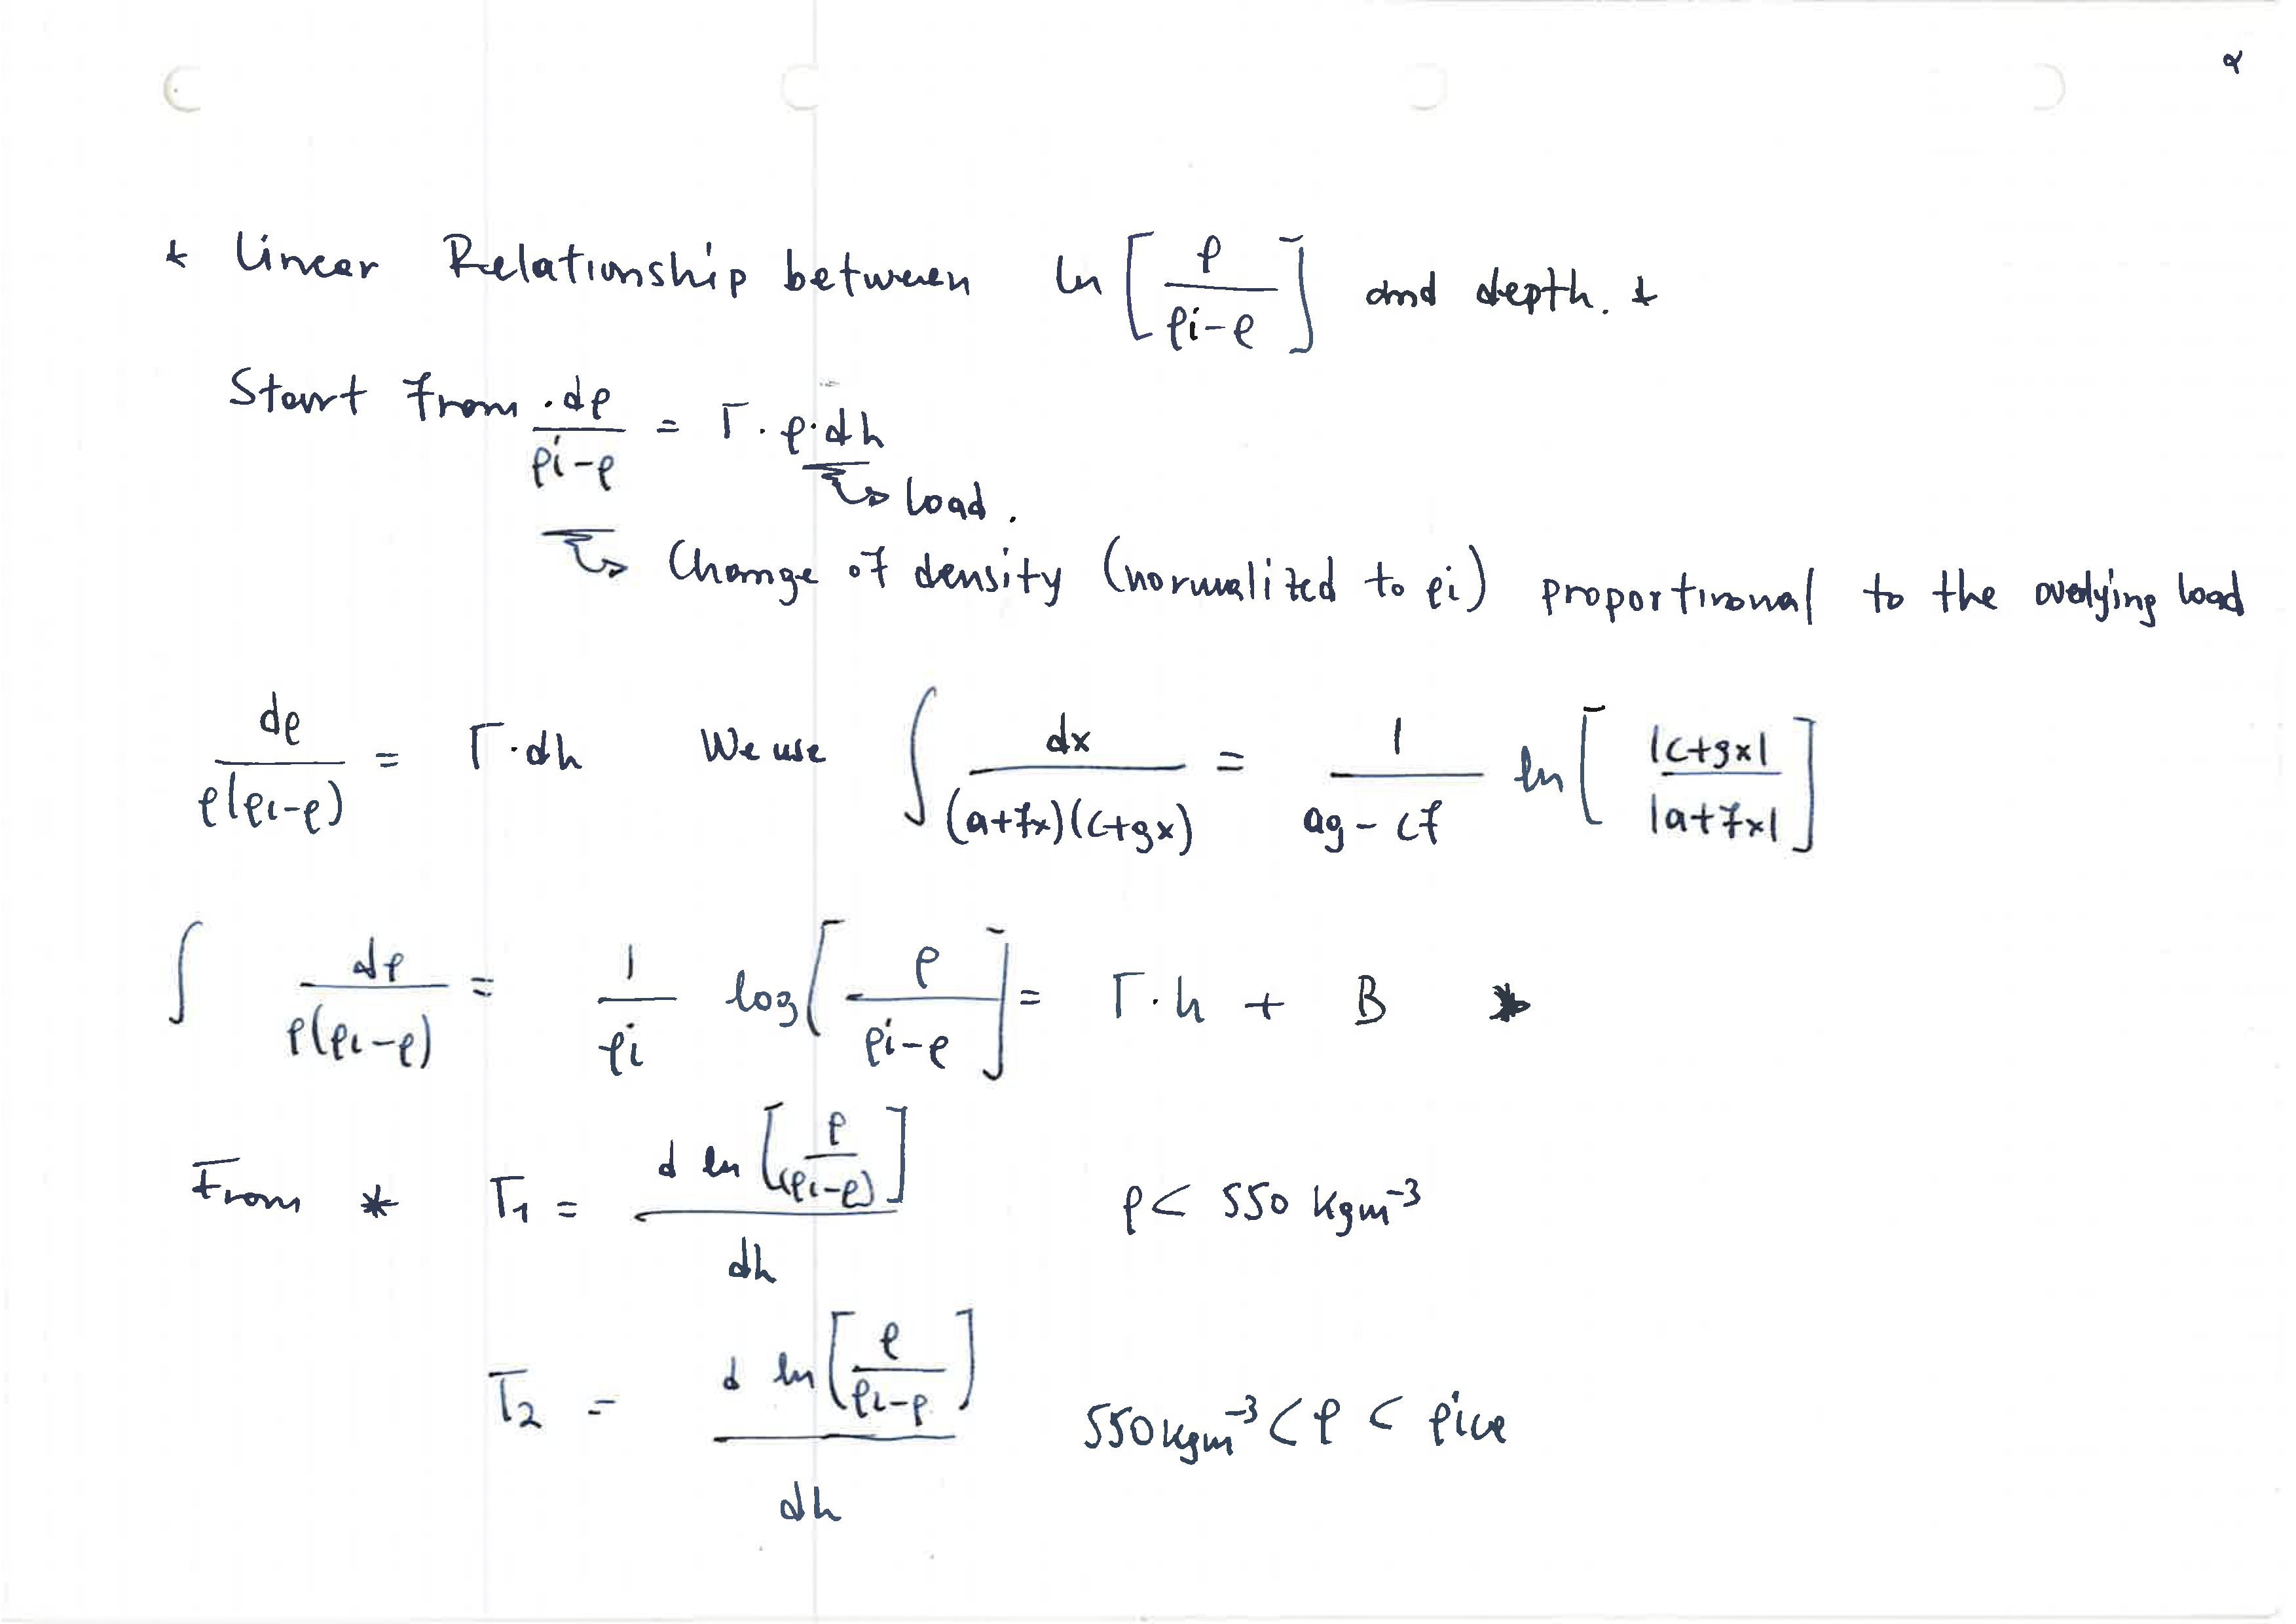

In [53]:
Image("../figs/herron_math_1.png", width = 900)

/Users/vasilis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in divide
/Users/vasilis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in log


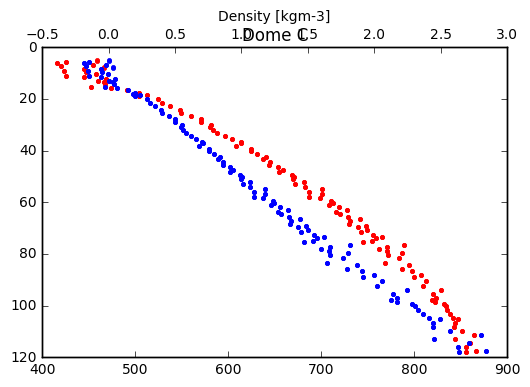

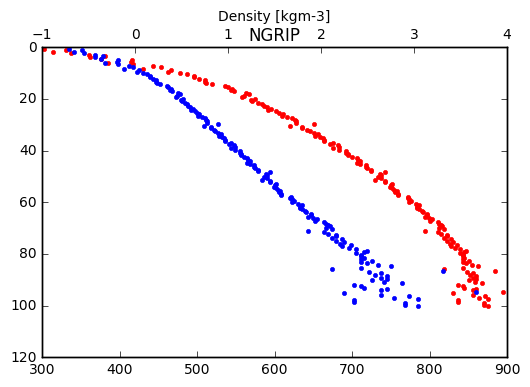

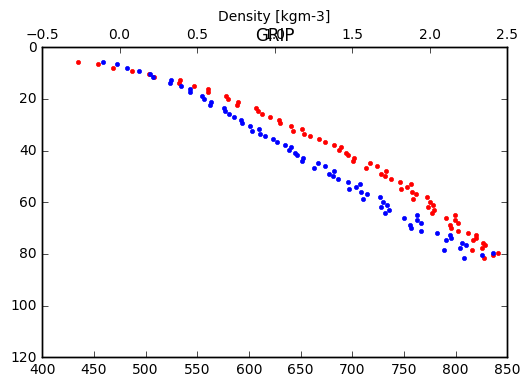

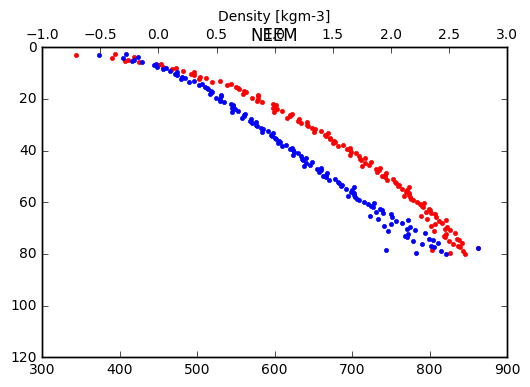

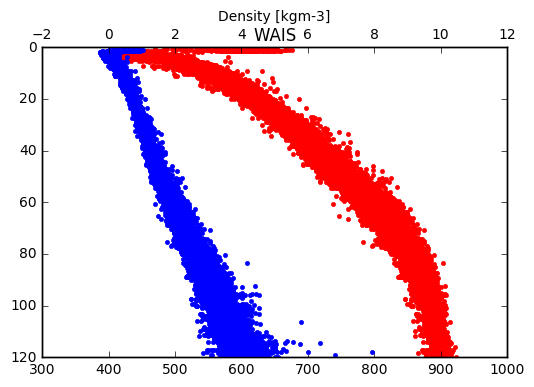

In [54]:
rho_ice = 917.0

data_domec = np.genfromtxt("DC-dens-JP.csv", delimiter=",")
z_domec = data_domec[:,0]
rho_domec = data_domec[:,1]
logrho_domec = np.log(rho_domec/(rho_ice - rho_domec))

data_ngrip = np.genfromtxt("./NGRIP_density.txt", delimiter=",", skip_header=2)
z_ngrip = data_ngrip[:,0]
rho_ngrip = data_ngrip[:,1]
logrho_ngrip = np.log(rho_ngrip/(rho_ice - rho_ngrip))

data_grip = np.genfromtxt("./grip_density.txt")
z_grip = data_grip[:,0][::2]
rho_grip = data_grip[:,1][::2]
logrho_grip = np.log(rho_grip/(rho_ice - rho_grip))

data_neem = np.genfromtxt("./NEEM07density.txt", skip_header=5)
z_neem = data_neem[:,1]
rho_neem = data_neem[:,2]
logrho_neem = np.log(rho_neem/(rho_ice - rho_neem))

data_wais = np.genfromtxt("./wais_density_Breton.txt", skip_header=15)
z_wais = data_wais[:,0]
rho_wais = data_wais[:,1]*1000.
logrho_wais = np.log(rho_wais/(rho_ice - rho_wais))

plt.figure(1)
plt.plot(rho_domec, z_domec, "r.")
plt.twiny()
plt.plot(logrho_domec, z_domec, ".")
plt.ylim([120,0])
plt.ylabel("Depth [m]")
plt.xlabel("Density [kgm-3]")
plt.title("Dome C")

plt.figure(2)
plt.plot(rho_ngrip, z_ngrip, "r.")
plt.twiny()
plt.plot(logrho_ngrip, z_ngrip, ".")
plt.ylim([120,0])
plt.ylabel("Depth [m]")
plt.xlabel("Density [kgm-3]")
plt.title("NGRIP")

plt.figure(3)
plt.plot(rho_grip, z_grip, "r.")
plt.twiny()
plt.plot(logrho_grip, z_grip, ".")
plt.ylim([120,0])
plt.ylabel("Depth [m]")
plt.xlabel("Density [kgm-3]")
plt.title("GRIP")


plt.figure(4)
plt.plot(rho_neem, z_neem, "r.")
plt.twiny()
plt.plot(logrho_neem, z_neem, ".")
plt.ylim([120,0])
plt.ylabel("Depth [m]")
plt.xlabel("Density [kgm-3]")
plt.title("NEEM")

plt.figure(5)
plt.plot(rho_wais, z_wais, "r.")
plt.twiny()
plt.plot(logrho_wais, z_wais, ".")
plt.ylim([120,0])
plt.ylabel("Depth [m]")
plt.xlabel("Density [kgm-3]")
plt.title("WAIS")


plt.show()

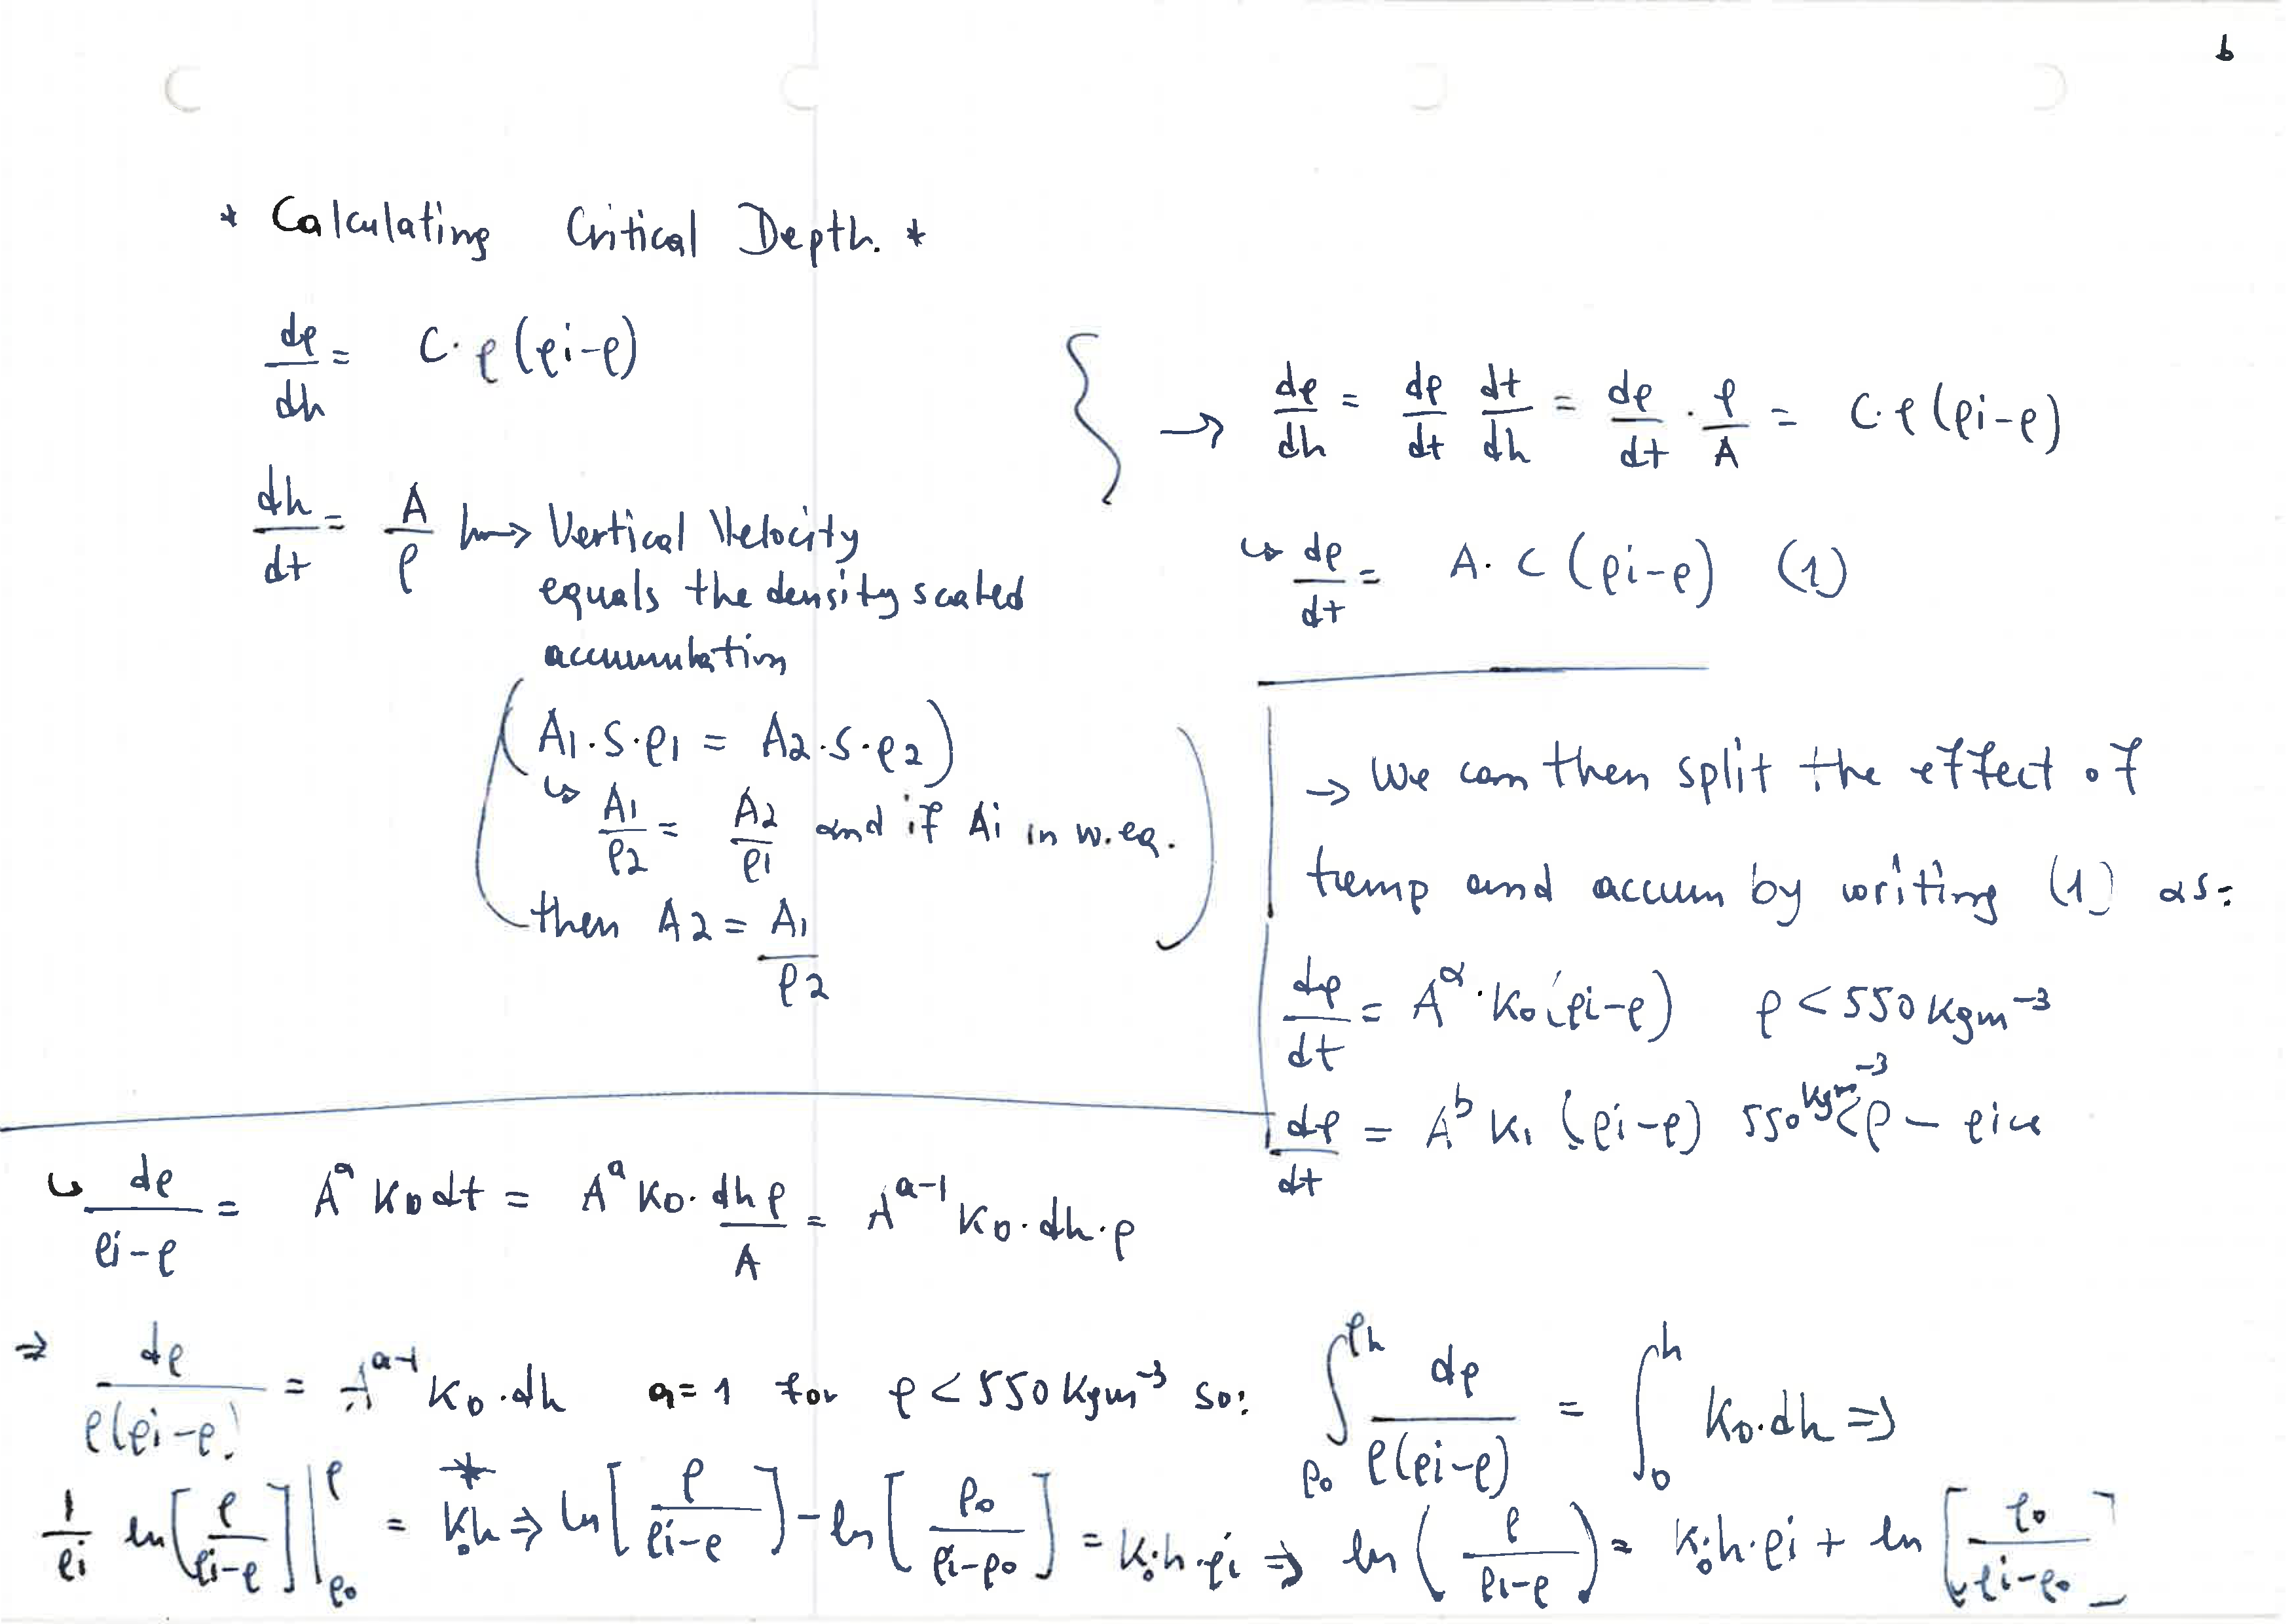

In [57]:
Image("../figs/herron_math_2.png", width = 900)

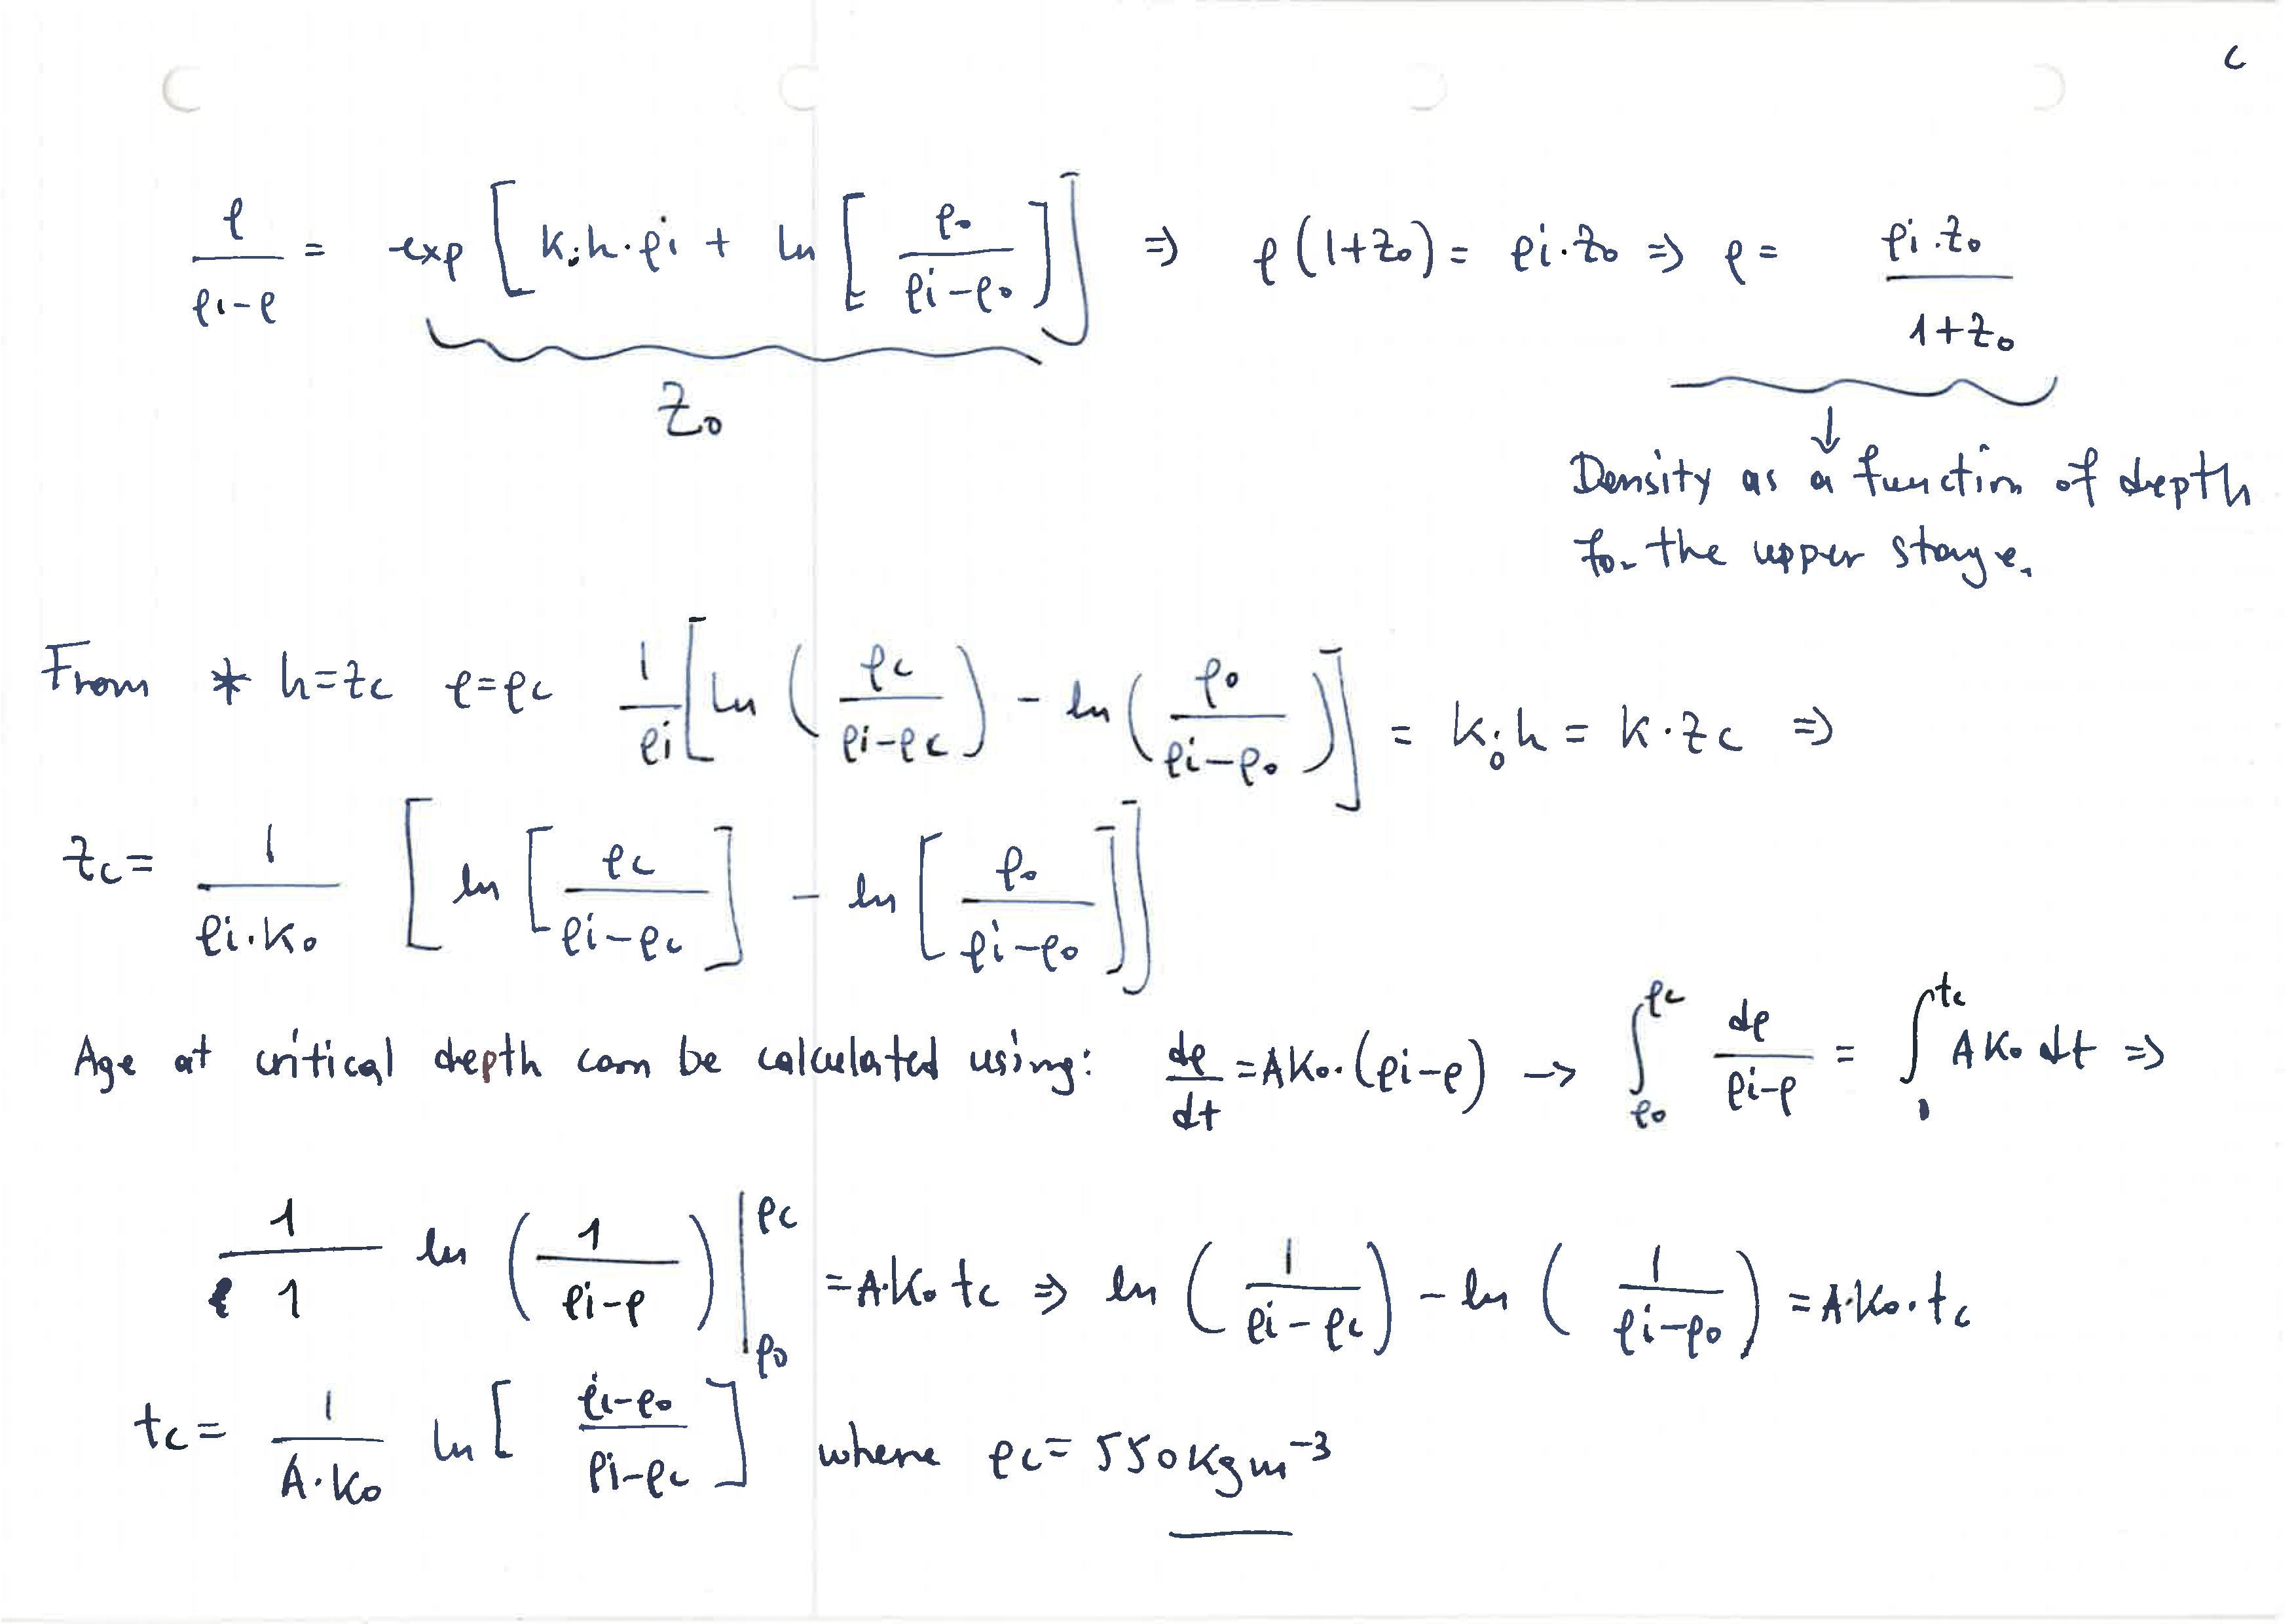

In [56]:
Image("../figs/herron_math_3.png", width = 900)

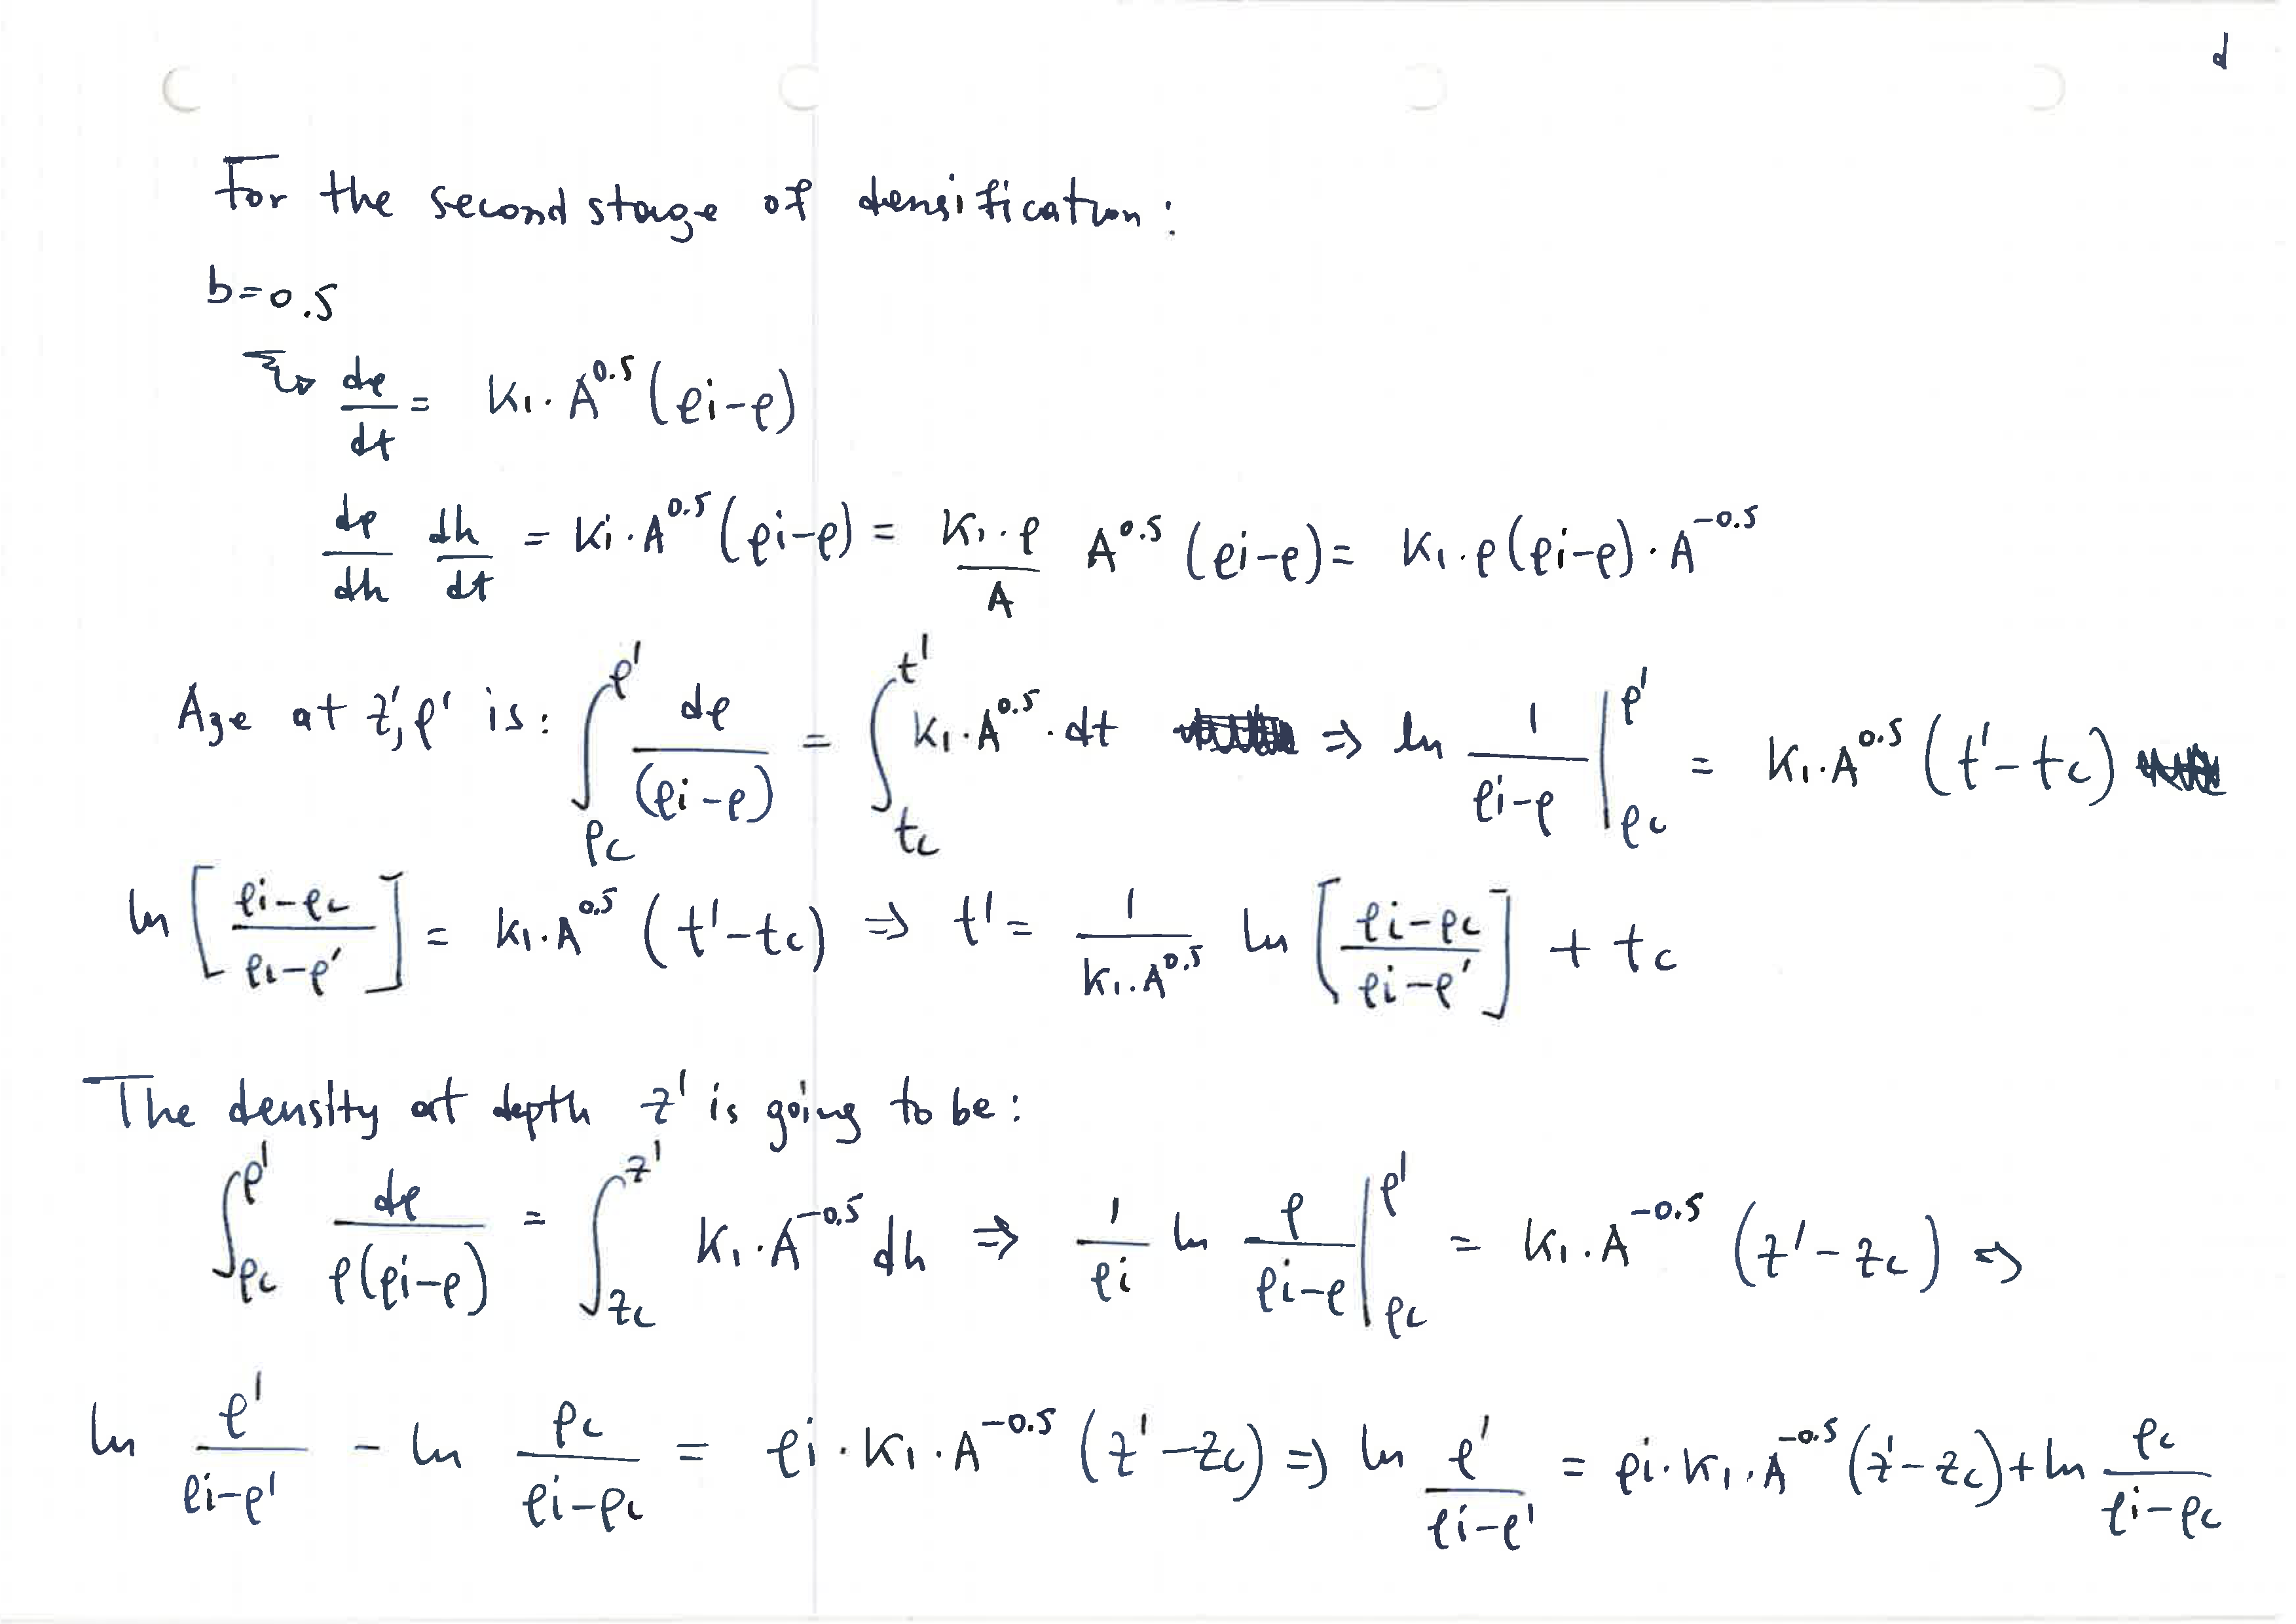

In [58]:
Image("../figs/herron_math_4.png", width = 900)

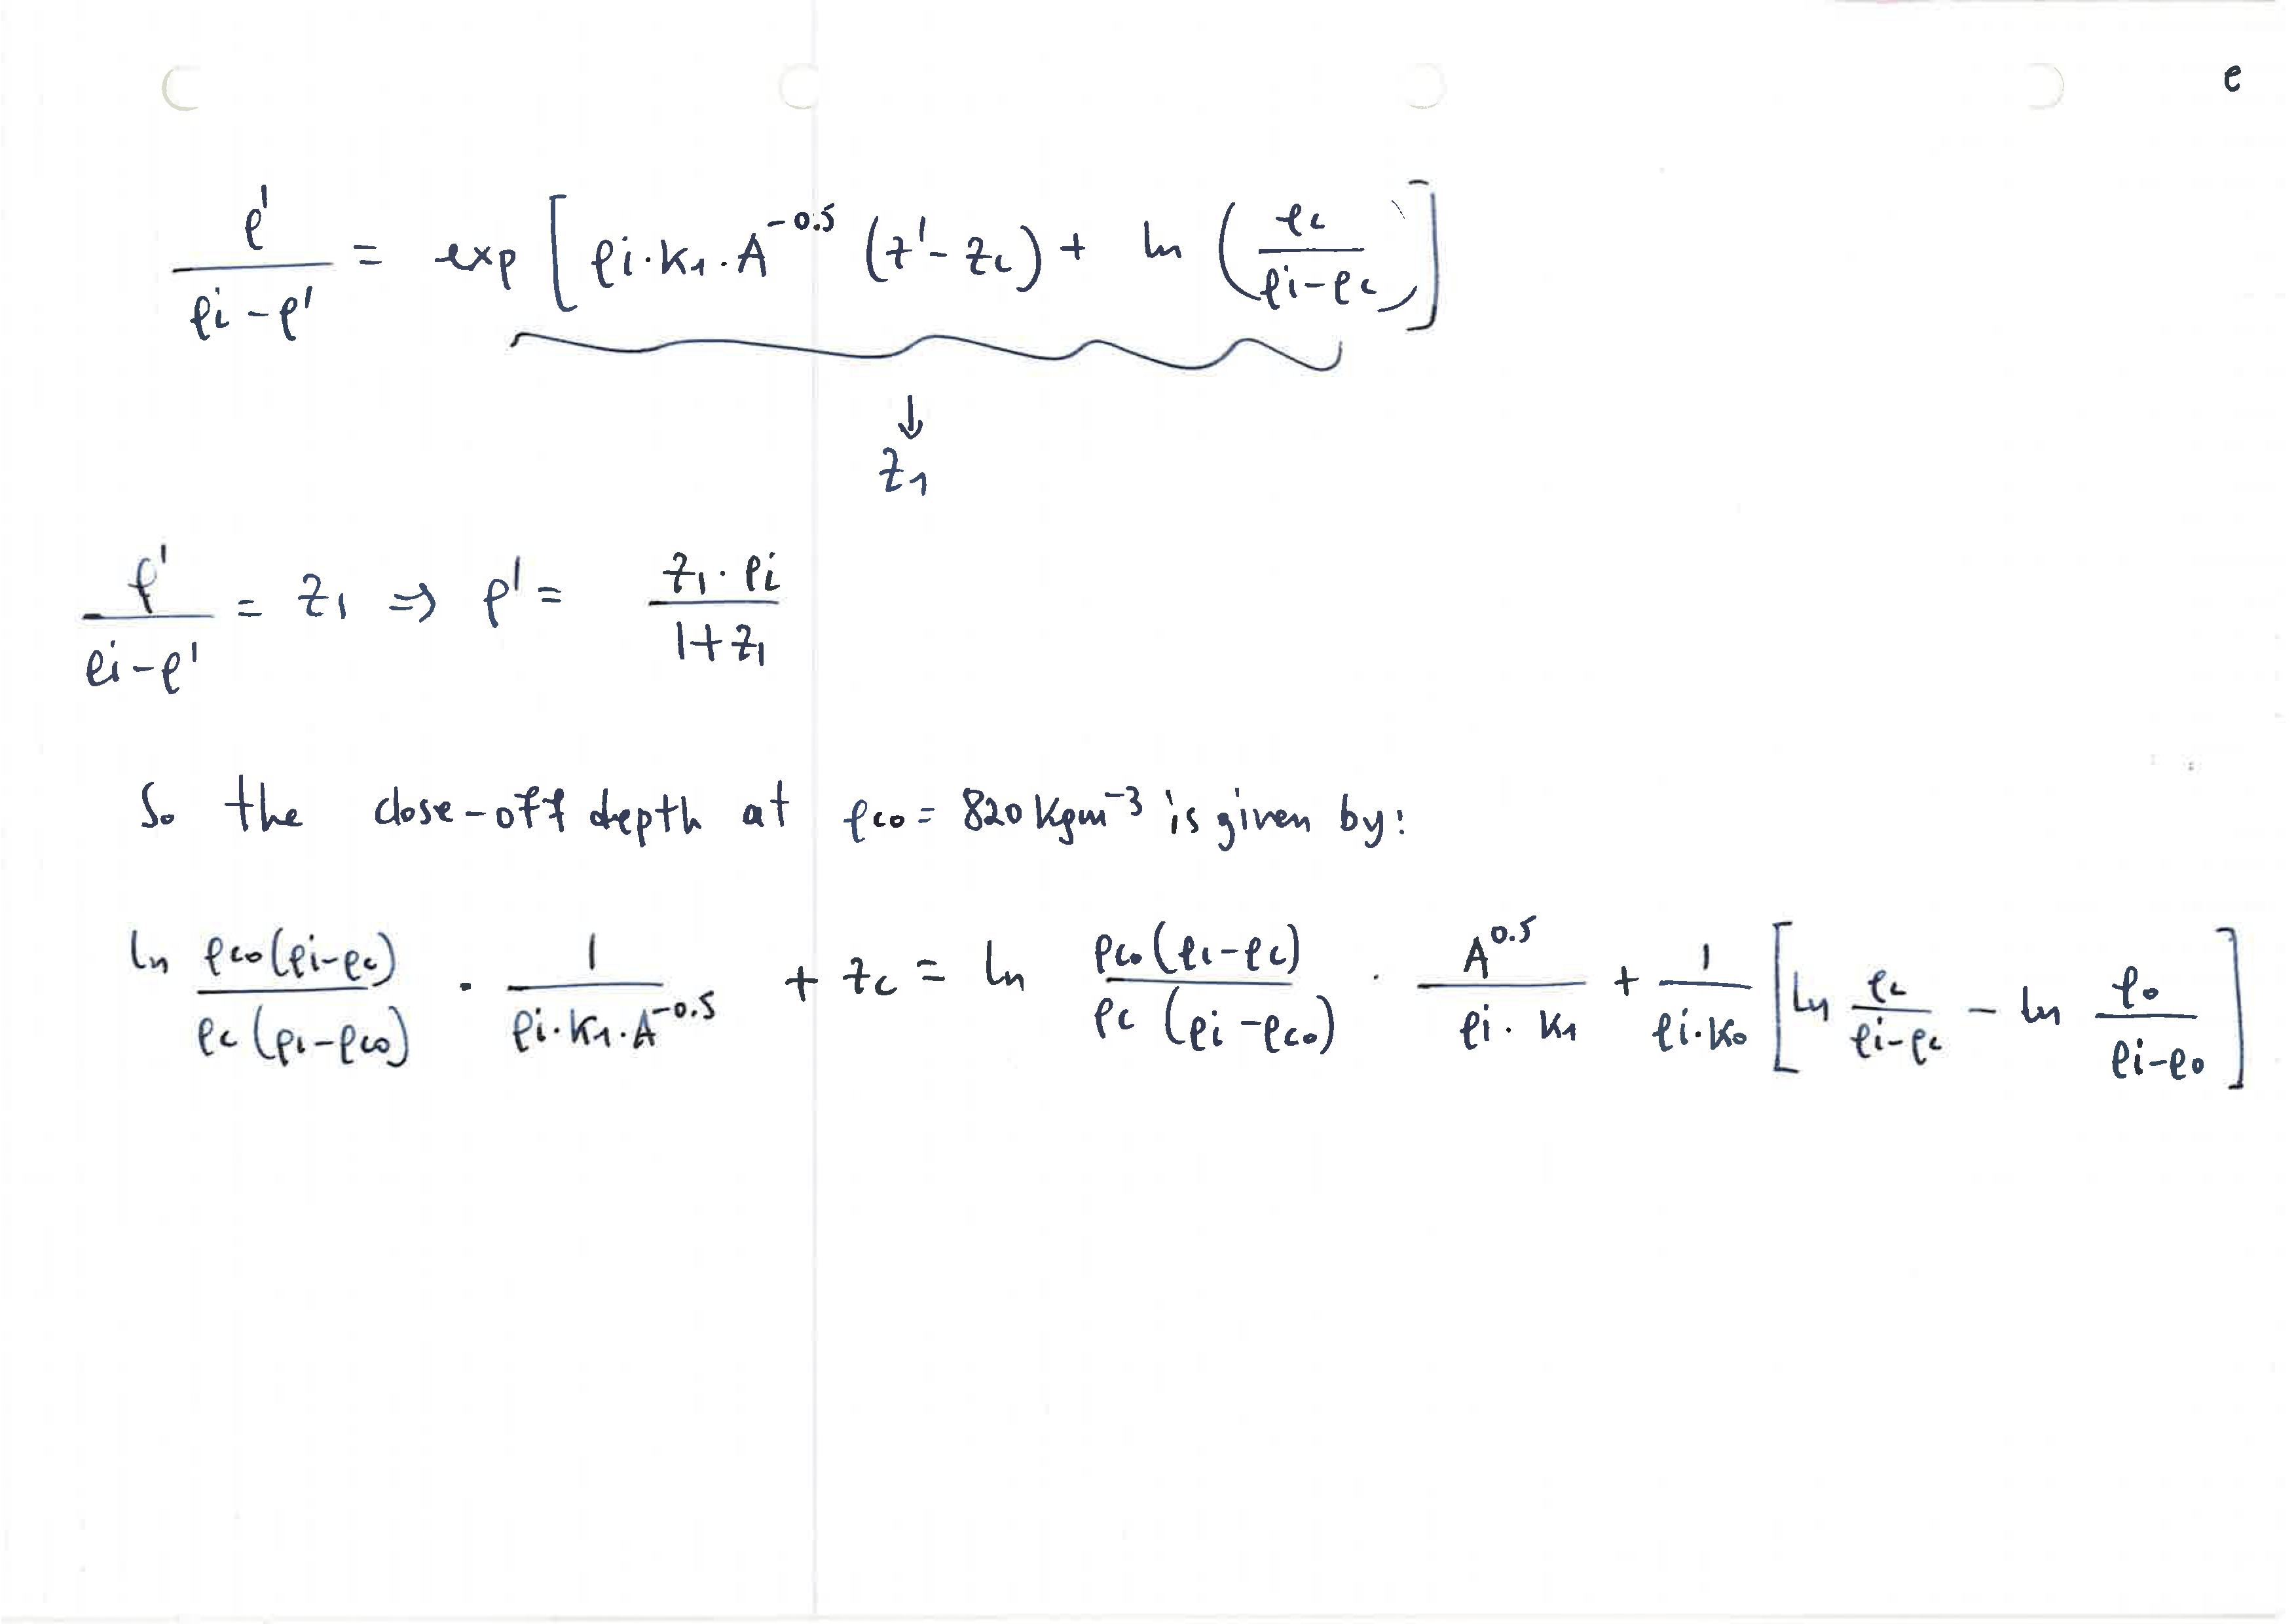

In [59]:
Image("../figs/herron_math_5.png", width = 900)

# An overview of ice core sites characteristics is given here from Buizert et al 2013

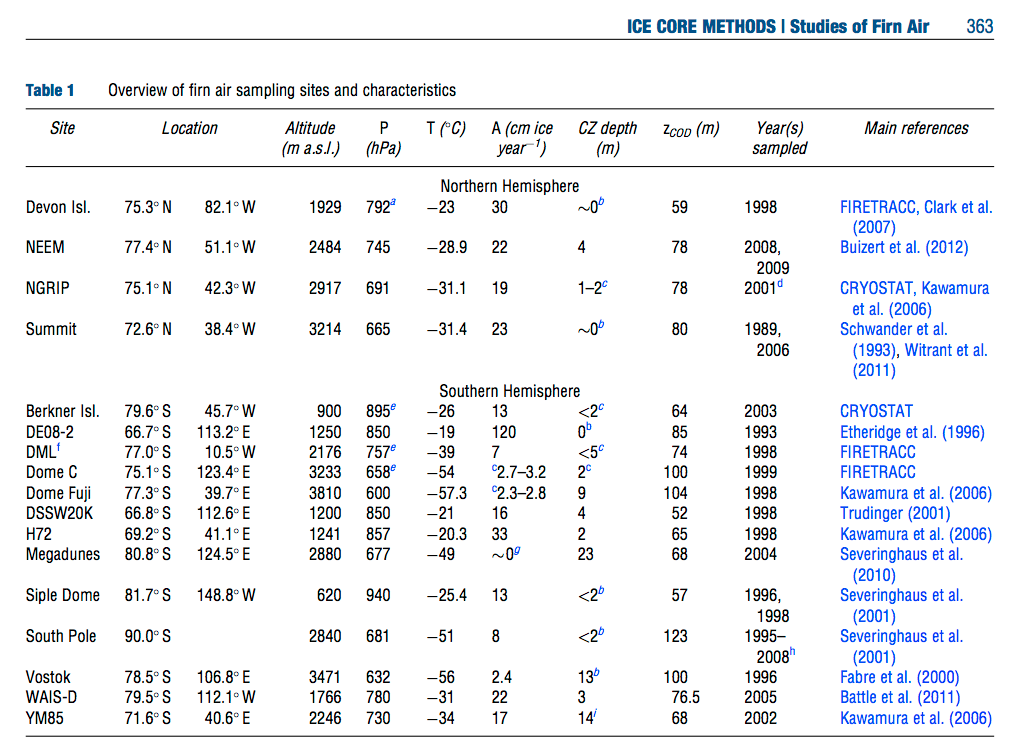

In [60]:
Image("../figs/buizer2013_sites.png", width = 900)

## Exercise
In Absalon you will find the following data sets:
* Dome Concordia, East Antarctica (DC-dens-JP.csv)
* GRIP, Central Greenland (grip_density.txt)
* NEEM2007, NE Greenland (NEEM07density.txt)
* NorthGRIP, Central Greenland (NGRIP_density.txt)
* WAIS-D, West Antarctica (wais_density_Breton.txt)

Use the boundary conditions given in the table of Buizer et al to run the H-L model for every site in the list. Calculate the close-off depth and the age of the bubbles at this depth.

Your results are unlikely to fit every core site very well. Implement fudge parameters f0, f1 in your code in front of the activation energies and tune them so you fit the data sets in a least squares sense.